**- Importing Libraries**

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime

**- Uploading Dataset**

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/car_sales.csv')

In [134]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [102]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['km_driven'].plot(kind='hist', bins=20, title='km_driven')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='year', y='selling_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='selling_price', y='km_driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['km_driven']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('km_driven')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['selling_price'].plot(kind='line', figsize=(8, 4), title='selling_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['km_driven'].plot(kind='line', figsize=(8, 4), title='km_driven')
plt.gca().spines[['top', 'right']].set_visible(False)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [104]:
df.shape

(4340, 8)

**- Checking for null values**

In [105]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [151]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#Applying to selling_price and km_driven
df = remove_outliers(df, 'selling_price')
df = remove_outliers(df, 'km_driven')

**- Exploratory Data Analysis(EDA)**

**Numerical Columns**





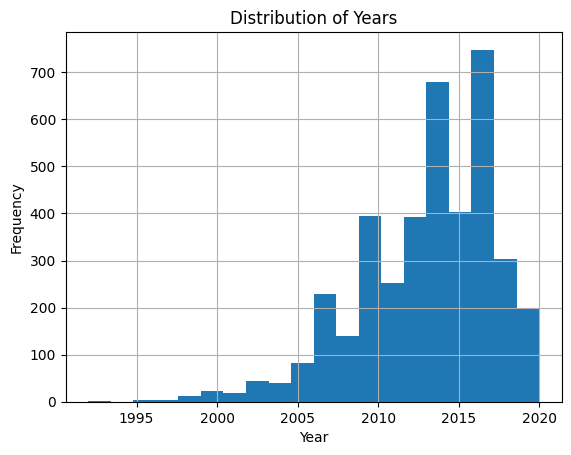

In [107]:
df['year'].hist(bins=20)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

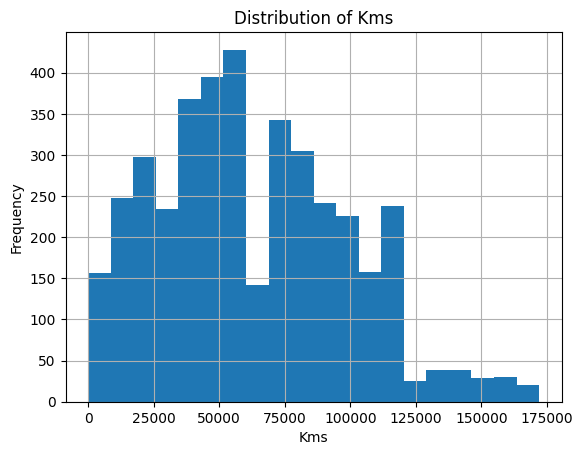

In [108]:
df['km_driven'].hist(bins=20)
plt.title('Distribution of Kms')
plt.xlabel('Kms')
plt.ylabel('Frequency')
plt.show()

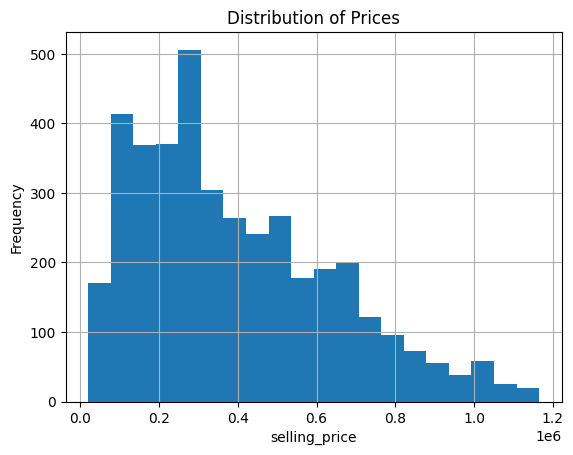

In [152]:
df['selling_price'].hist(bins=20)
plt.title('Distribution of Prices')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()

**- Removal of Outliers**

**Categorical Columns - Histograms**

In [150]:
#Unique values and counts
print(df['fuel'].value_counts())
print(df['seller_type'].value_counts())
print(df['transmission'].value_counts())
print(df['owner'].value_counts())
print(df['seller_type'].unique())
print(df['brand'].unique())


fuel
Diesel    2153
Petrol    2123
Other       64
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner     2832
Second Owner    1106
Third Owner      304
Other             98
Name: count, dtype: int64
['Individual' 'Dealer' 'Trustmark Dealer']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


**- Merge Rare Categories**

In [153]:
# Merge rare categories in feul column
rare_categories = ['LPG', 'CNG', 'Electric']
df['fuel'] = df['fuel'].replace(rare_categories, 'Other')
print(df['fuel'].value_counts())

fuel
Petrol    2081
Diesel    1817
Other       64
Name: count, dtype: int64


In [154]:
# Merge rare categories for owner column
rare_categories = ['Fourth & Above Owner', 'Test Drive Car']
df['owner'] = df['owner'].replace(rare_categories, 'Other')
print(df['owner'].value_counts())

owner
First Owner     2551
Second Owner    1052
Third Owner      269
Other             90
Name: count, dtype: int64


**Countplots**

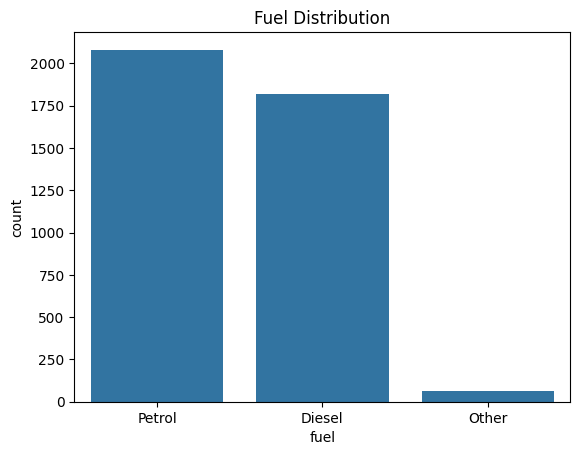

In [155]:
sns.countplot(x='fuel', data=df)
plt.title('Fuel Distribution')
plt.show()

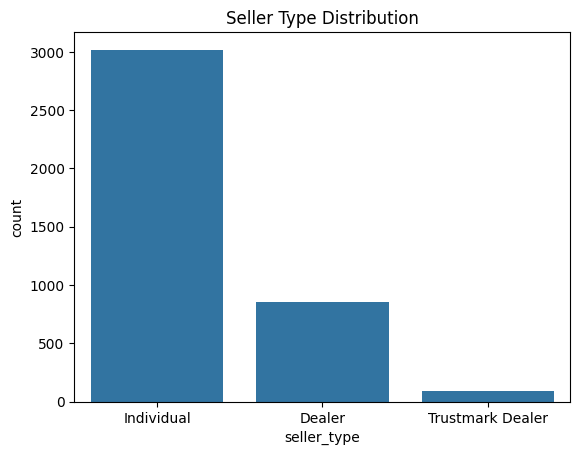

In [156]:
sns.countplot(x='seller_type', data=df)
plt.title('Seller Type Distribution')
plt.show()

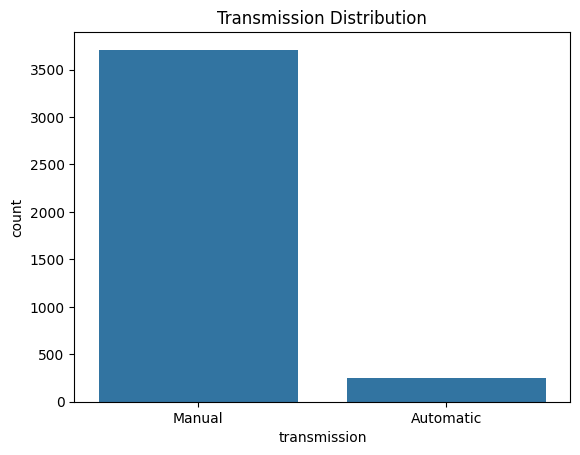

In [114]:
sns.countplot(x='transmission', data=df)
plt.title('Transmission Distribution')
plt.show()

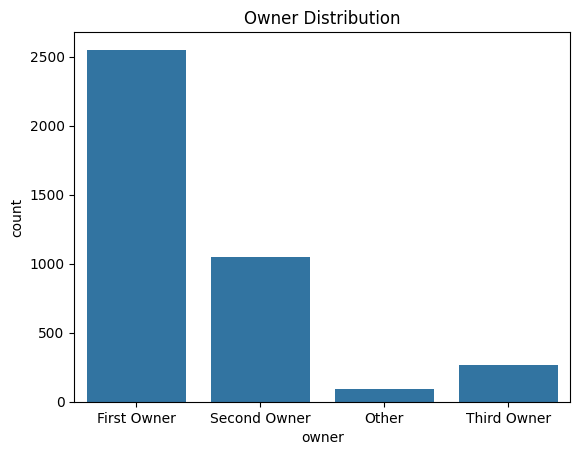

In [131]:
sns.countplot(x='owner', data=df)
plt.title('Owner Distribution')
plt.show()

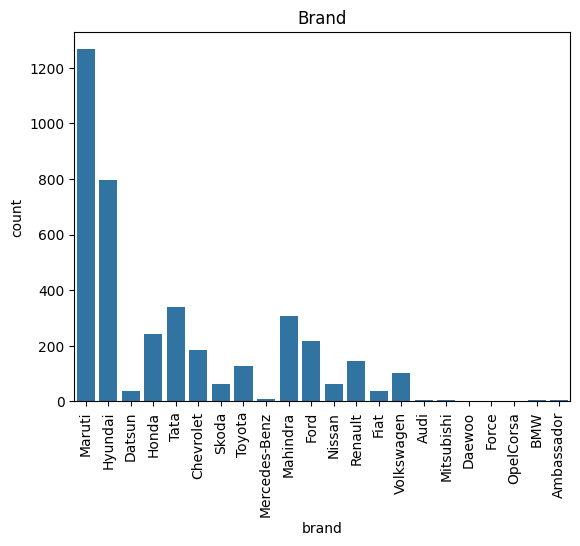

In [163]:
sns.countplot(x='brand', data=df, asc )
plt.title('Brand')
plt.xticks(rotation=90)
plt.show()

**- Relationships Between Columns**

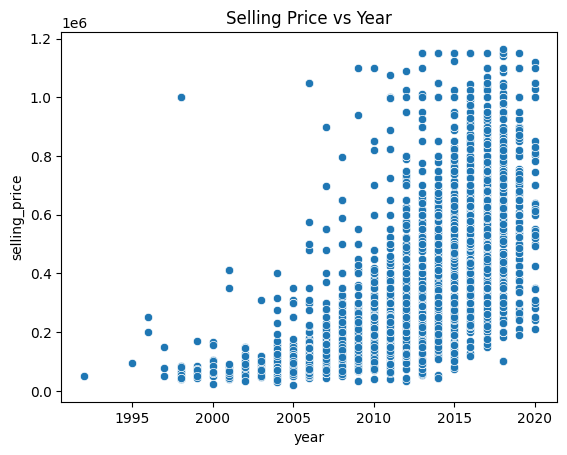

In [157]:
#Selling Price vs Year
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs Year')
plt.show()

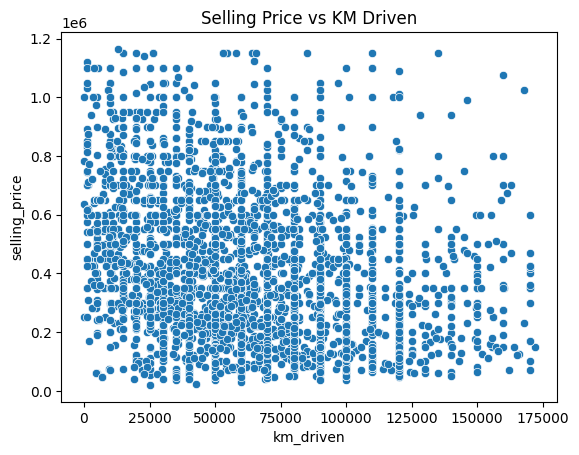

In [158]:
# Selling Price vs KM Driven
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs KM Driven')
plt.show()

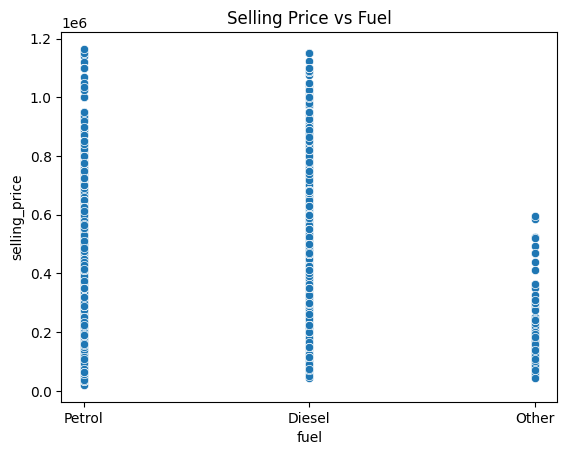

In [159]:
# Selling price by fuel
sns.scatterplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs Fuel')
plt.show()

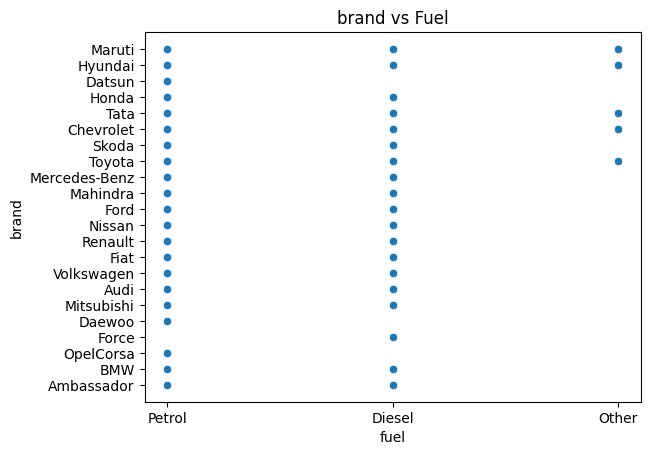

In [160]:
# feul by brand
sns.scatterplot(x='fuel', y='brand', data=df)
plt.title('brand vs Fuel')
plt.show()

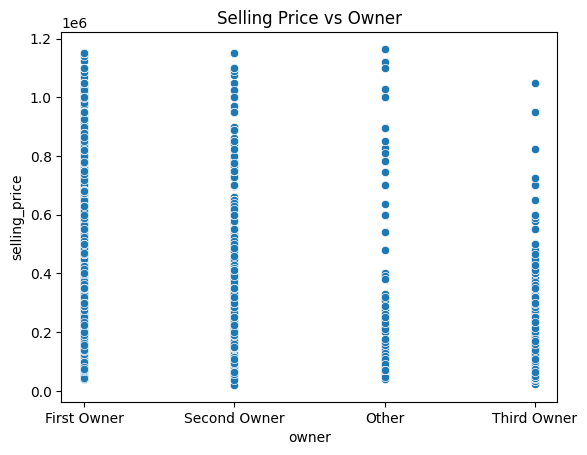

In [161]:
# Selling price by owner
sns.scatterplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price vs Owner')
plt.show()

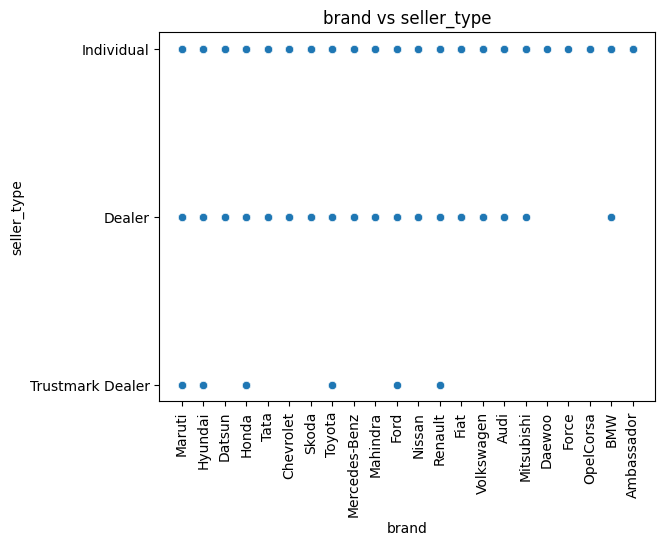

In [162]:
#brand vs seller_type
sns.scatterplot(x='brand', y='seller_type', data=df)
plt.title('brand vs seller_type')
plt.xticks(rotation=90)
plt.show()

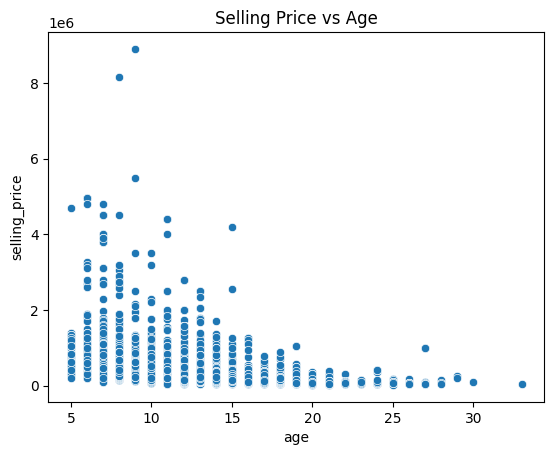

In [143]:
# Selling price vs age
sns.scatterplot(x='age', y='selling_price', data=df)
plt.title('Selling Price vs Age')
plt.show()

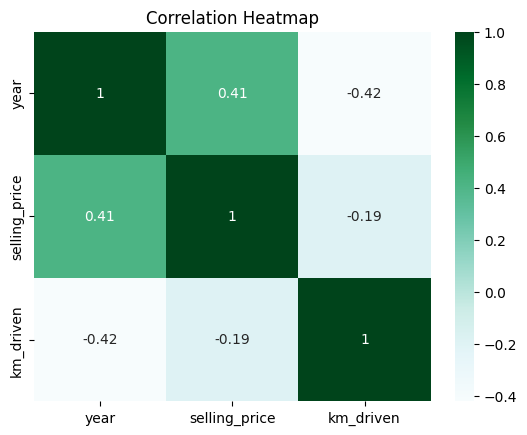

In [140]:
# Correlation Heatmap (numerical only)
correlation_matrix = df[['year', 'selling_price', 'km_driven']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')
plt.title('Correlation Heatmap')
plt.show()

**- EDA Summary**

🔹 Numerical Columns

Year

Cars range from older to recent models.

Majority of vehicles are from 2010 onwards, with peak concentration around 2012–2018.

Kilometers Driven (km_driven)

Highly skewed distribution (some cars driven much higher than others).

After outlier removal, most cars fall below 150,000 km.

Selling Price

Positively skewed distribution (a few very high-value cars).

Most used cars are priced in the low to mid range.

🔹 Categorical Columns

Fuel Type

Petrol: ~2081 cars (48%)

Diesel: ~1817 cars (42%)

Other (CNG/LPG/Electric merged): ~64 cars (2%)

Seller Type

Individual sellers dominate: ~3244 (75%)

Dealers: 994 (23%)

Trustmark Dealers: 102 (2%)

Transmission

Manual: ~3892 cars (90%)

Automatic: ~448 cars (10%)

Owner

First Owner: 2551 (59%)

Second Owner: 1052 (24%)

Third Owner: 269 (6%)

Other (Fourth/Test Drive merged): 90 (2%)

Brand

Dominated by Maruti, Hyundai, Honda, Tata, and Mahindra.

Luxury brands (BMW, Audi, Mercedes-Benz, Jaguar, Volvo) are rare but present.

🔹 Key Relationships

Selling Price vs Year:
Newer cars generally have higher selling prices.

Selling Price vs KM Driven:
Cars with higher kilometers driven tend to have lower prices (negative relationship).

Fuel Type vs Price:
Diesel vehicles are generally priced slightly higher than petrol in the same age range.

Owner vs Price:
First-owner cars command the highest resale value. Cars with multiple owners have significantly lower prices.

Brand Influence:
Premium brands (BMW, Mercedes, Audi) maintain high resale value, while local brands (Maruti, Tata) dominate the lower/mid segments.

🔹 Correlation Insights

Year has a positive correlation with selling_price.

KM Driven has a negative correlation with selling_price.

Overall, car age, brand, ownership, and fuel type are major price influencers.

**- Text Columns (Car Name)**

In [142]:
# Top 10 most common car names
print(df['brand'].value_counts().head(10))
print(df['name'].value_counts().head(10))

brand
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Name: count, dtype: int64
name
Swift Dzire VDI      69
Alto 800 LXI         59
Alto LXi             47
EON Era Plus         35
Alto LX              35
Swift VDI BSIV       29
Wagon R VXI BS IV    29
Swift VDI            27
Wagon R LXI Minor    24
EON Magna Plus       24
Name: count, dtype: int64


**- Feature Engineering**

In [138]:
# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the car
df['age'] = current_year - df['year']

# Check the new column
print(df[['name', 'year', 'age']].head())

                name  year  age
0             800 AC  2007   18
1  Wagon R LXI Minor  2007   18
2       Verna 1.6 SX  2012   13
3    RediGO T Option  2017    8
4    Amaze VX i-DTEC  2014   11


In [135]:
# Extract brand name from name
df['brand'] = df['name'].str.split().str[0]

# Check the new column
print(df[['name', 'brand']].head())

                       name    brand
0             Maruti 800 AC   Maruti
1  Maruti Wagon R LXI Minor   Maruti
2      Hyundai Verna 1.6 SX  Hyundai
3    Datsun RediGO T Option   Datsun
4     Honda Amaze VX i-DTEC    Honda


In [136]:
# Remove first word from name column
df['name'] = df['name'].str.split().str[1:].str.join(' ')

# Check the new column
print(df[['name']].head())

                name
0             800 AC
1  Wagon R LXI Minor
2       Verna 1.6 SX
3    RediGO T Option
4    Amaze VX i-DTEC


In [139]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,age
0,800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18
1,Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18
2,Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,13
3,RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,8
4,Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,11


In [197]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,1
fuel,0
seller_type,0
transmission,0
owner,0
brand,0
age,0


In [206]:
df_copy = df.dropna(axis=1)

In [207]:
df_copy[df.isnull().any(axis=1)]

,name,year,selling_price,fuel,seller_type,transmission,owner,brand,age,selling_price_log


**- Preprocessing Data**

In [183]:
# Copy dataset
df_copy = df.copy()

# Features and target
X = df_copy.drop('selling_price', axis=1)
y = df_copy['selling_price']

# Encode the categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand','name']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [209]:
df_copy.head()

,name,year,selling_price,fuel,seller_type,transmission,owner,brand,age,selling_price_log
0,800 AC,2007,-0.133907,Petrol,Individual,Manual,First Owner,Maruti,18,0.628433
1,Wagon R LXI Minor,2007,-0.101042,Petrol,Individual,Manual,First Owner,Maruti,18,0.643902
2,Verna 1.6 SX,2012,-0.050315,Diesel,Individual,Manual,First Owner,Hyundai,13,0.668306
3,RediGO T Option,2017,-0.078742,Petrol,Individual,Manual,First Owner,Datsun,8,0.654551
4,Amaze VX i-DTEC,2014,-0.059274,Diesel,Individual,Manual,Second Owner,Honda,11,0.663949


- Split into Train and Split set

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- Initialize models

In [205]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

 - Train & Evaluate the models

In [212]:
# Train and Predict
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

#Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

#Display Results
results_df = pd.DataFrame(results).T
print(results_df)



                            MSE        R2
Linear Regression  3.103926e-08  0.999950
Decision Tree      4.185123e-09  0.999993
Random Forest      2.578080e-09  0.999996
XGBoost            1.516449e-07  0.999755


- Check feature Importance


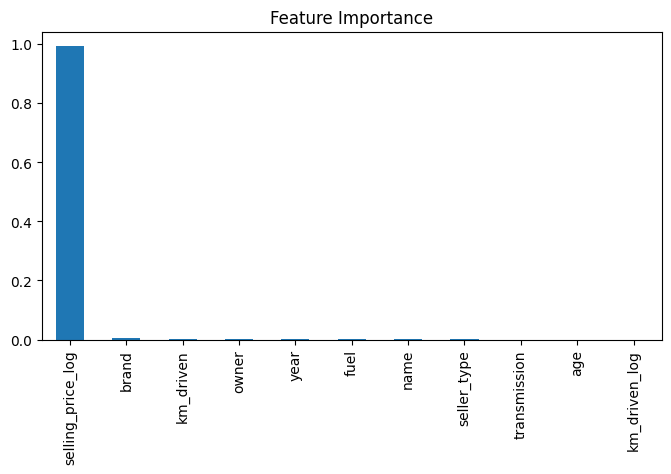

In [213]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance")
plt.show()

**- Conclusion**

🔎 Observation:

All models perform extremely well, with Random Forest achieving the best balance of accuracy and generalization.

Linear Regression also performed surprisingly well due to clean feature engineering.


✅ Conclusion

Car age and kilometers driven are the strongest predictors of price depreciation.

Brand reputation plays a significant role, with premium brands retaining higher resale value.

Ownership history and transmission type also influence buyer preference and resale price.

Random Forest and Decision Tree models give near-perfect predictions, making them reliable for production deployment in a car price prediction system.